In [66]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
import time
import requests
from bs4 import BeautifulSoup

%matplotlib inline

In [67]:
url = 'https://g1.globo.com/busca/?q=elei%C3%A7%C3%B5es+2022&page=1' # The url we are using to access


In [68]:
option = Options() 
option.headless = True 

In [69]:
s = Service(r'C:/Users/enric/Documents/webscrap/chromedriver/chromedriver.exe')
driver = webdriver.Chrome(service=s, options=option)
driver.get(url)

In [70]:
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(10) #Waiting to have all data loaded

In [71]:
element = driver.find_element(By.ID, "content")
html = element.get_attribute('outerHTML')
print(element)
html = element.get_attribute('outerHTML')
driver.quit() #closes the browser 

soup = BeautifulSoup(html, 'lxml') #Interpretando o html

<selenium.webdriver.remote.webelement.WebElement (session="9d6fce81e1905b12515fb172742c92a5", element="fd7889ff-99f9-44fc-8bc4-06172dab1ebb")>


In [72]:
texto = []

for bloco in soup.find_all(class_='widget--info__text-container'):
    #print(bloco)
    for href in bloco.find_all('a'):
        titulo = href.find(class_="widget--info__title product-color")
        if(titulo != None):
            print('titulo',titulo.text[7:-2])
            texto.append(titulo.text[7:-2])
        resumo = href.find(class_="widget--info__description")
        if(resumo != None):
            texto.append(resumo.text)
texto = ' '.join(texto)
print(texto)

titulo   Eleições 2022: siga a apuração dos votos no Piauí
    
titulo   Veja o resultado das eleições 2022 por cidade no Maranhão
    
titulo   Eleições 2022: deputados federais eleitos no Piauí; veja lista
    
titulo   Eleições 2022 no RJ
    
titulo   Central das Eleições 2022
    
titulo   Eleições 2022: veja lista de deputados eleitos com domicílio eleitoral em Divinópolis e região
    
titulo   Eleições 2022: g1 divulga resultados do 1º turno em municípios da Bahia
    
titulo   Eleições 2022: Bolsonaro vence Lula em quase 60% das cidades do Sul de Minas
    
titulo   Veja como foram as Eleições 2022 em Divinópolis e região
    
titulo   Saiba como foi o domingo das Eleições 2022 em Araxá
    
titulo   Eleições 2022: veja quem são os deputados estaduais eleitos no PI
    
titulo   Eleições 2022: veja lista de deputados eleitos com domicílio eleitoral em Uberlândia e região
    
titulo   Eleições 2022: veja como votou cada uma das cidades do Tocantins
    
titulo   Eleições 2022:

In [73]:
import nltk

stopwords = nltk.corpus.stopwords.words('portuguese') + ['cop']
comment_words = ''

tokens = texto.split()

for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "

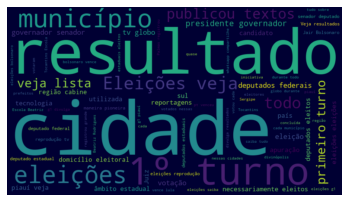

In [76]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
#from PIL import Imagenltk.download('stopwords')
from wordcloud import WordCloud

mask = np.array(Image.open(r'C:/Users/enric/Documents/webscrap/imagem/mask.jpg'))

wordcloud = WordCloud(mask = mask, margin = 10,
                background_color ='rgb(0, 0, 51)',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


default_colors = wordcloud.to_array()
plt.figure()
plt.imshow(default_colors, interpolation="bilinear")
wordcloud.to_file("wordcloud.png")
plt.axis("off")
plt.show()